# Machine Learning 101

# ¿Qué es Machine Learning (ML)?
> *Machine Learning es el área de estudio que le da a las computadoras la habilidad de aprender sin necesidad de ser explícitamente programadas.* - Arthur Samuel

> Machine Learning es un conjunto de métodos que automáticamente pueden detectar patrones en la información, y luego usar los patrones descubiertos para predecir información futura o realizar otro tipo de toma de decisiones bajo incertidumbre. 
Kevin P Murphy

En general, se dice que un programa de computación aprende de una experiencia **E** con respecto a una _clase_ de tarea **T** y medida de desempeño **P** si el desempeño en **T**, medido bajo **P** mejora con experiencia **E**

# La tarea $T$

Machine Learning nos ayuda a atacar problemas o tareas que serían difíciles para un humano escribir usando métodos *tradicionales* de programación, i.e, definir la estructura lógica que debería seguir un progama para llegar al resultado. 

Una **tarea** en ML es descrita en término de como el sistema debe procesar una **observación** ($x$), la cual definimos con un arreglo de números. 

$$
    x = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix},
$$

el cuán conocemos un vector. Un vector, en python, es representado por medio de un numpy array. 

```python 
np.array([1,2,3,4,5])
```


Si, por ejemplo, nuestras observaciones son las características de una persona, podríamos describir una observación de la siguiente manera: 
$$
   \mbox{persona}_i = \begin{bmatrix} \mbox{edad} \\ \mbox{peso} \\ \mbox{estatura} \\ \mbox{color ojos} \\ \vdots \end{bmatrix}
$$


¿Cuáles podrían ser ejemplos de tareas?
La **tarea**, dado $\mbox{persona}_i$, sería el resultado que pudiéramos obtener una vez procesada esta información: 
ejemplos: edad que más se repite, peso-estatura (índice de masa corporal), probabilidad de que haga deporte una persona, probabilidad del género, prima de un seguro de vida, probabilidad de gusto hacia cierto producto (crédito nómina, credito auto, crédito hipotecario, crédito personal, seguros auto/vida/hogar, tarjeta de crédito, inversiones: fondos de inversión, instrumentos de capitales, pagarés, etc), marketing, si una persona es sujeta de crédito, detectar enfermedades, etc.  



*Ejemplos de otras tareas en Machine Learning*
- Marketing
- Detectar transacciones fraudulentas
- Estimar Ventas Futuras
- Detectar códigos de Guerra 
- Reconecer los dígitos de una imagen 

*Tareas no apropiadas para machine learning*
* Escribir un programa que calcule la secuencia de Fibonacci
* Escribir un programa que realice una operación aritmética

## Una tarea que no necesita machine learning

Supongamos que, dadas tres observaciones de personas (`persona1`, `persona2`, `persona3`)¿sería la tarea **T** de calcular el índice de masa corporal un problema de Machine Learning?
$$
    \mbox{BMI} = \frac{\mbox{Masa}_{Kg}}{\mbox{Altura}_{m}^2}
$$

donde,
$$
    \mbox{persona}_i = \begin{bmatrix} \mbox{masa} \\ \mbox{altura} \end{bmatrix}
$$

In [1]:
#La tarea para un algoritmo de ML es encontrar la función apropiada para los 
#datos en cuestión. En este ejemplo 
#no es necesario usar ML dado que estamos seguros del resultado que arroja 
#la tarea en cada ejemplo

import numpy as np 
persona1=np.array([60,1.4])
persona2=np.array([180,1.2])
persona3=np.array([62,1.66])
# La primera entrada es el peso en kg y la segunda la altura en metros

In [2]:
def bmi(persona):
    '''
    Calcula el Índice de Masa Corporal de una persona
    Parámetros: 
    ----
    persona: arreglo
    cuyo primer elemento es el peso (en kg) y el segundo elemento es la 
    altura (en metros)'''
    
    return persona[0]/persona[1]**2

In [3]:
print(bmi(persona1))
print(bmi(persona2))
print(bmi(persona3))

30.612244897959187
125.0
22.49963710262738


## Las Clases de Tareas
- Clasificación 
    - Asignar una calificación del 1 al 5 para una película
    - Sentimiento del mercado respecto a un producto
    - Bajar/Mantener/Subir Califiación Crediticia 
    - Bajar/Mantener/Subir Tasa de Referencia  Banco Central 
    - Probabilidad: Alta/Baja de comprar un producto 
- Regresión 
    - Estimar Ventas Futuras
    - Estimar Precios de Productos
    - Estimar Peso de una persona (dada su altura)
 
- *Machine Translation*
    - Traducir 
- Detección de Anomalías. 
    - Dado un sistema, encontrar patrones estadísticos fuera del promedio de observaciones "normales"
- Reducción de Dimensión
    - PCA

# La Experiencia E
La *experiencia* es la información de la cual se alimenta nuestro modelo para realizar estimaciones. El tipo de experiencia depende de la clase de tarea de la cuál estemos hablando. Esta información se ve representada en un conjunto de observaciones que llamaremos un **dataset** (la base de datos)

Considerando el ejemplo anterior, si contamos con 3 ejemplos de personas, el agrupamiento de cada una de las espersona conformaría nuestra base de datos. 


$$
    \mbox{personas} = \begin{bmatrix}
    \mbox{persona}_1, \mbox{persona}_2, \mbox{persona}_3
    \end{bmatrix}
$$

$$
    \mbox{personas} = \begin{bmatrix}
        \mbox{edad}_1 & \mbox{edad}_2 & \mbox{edad}_3 \\
        \mbox{peso}_1 & \mbox{peso}_2 & \mbox{peso}_3 \\
        \mbox{estatura}_1 & \mbox{estatura}_2 & \mbox{estatura}_3 \\
        \mbox{color ojos}_1 & \mbox{color ojos}_2 & \mbox{color ojos}_3 \\
        \vdots & \vdots & \vdots
    \end{bmatrix}
$$


Otra representación más común de los datos es utilizando cada columna como caractarestíca y cada fila como observación (persona). 

Persona | edad | peso | estatura
--- | --- | --- | ---
$\mbox{persona}_1$ | $\mbox{edad}_1$ | $\mbox{peso}_1$ | $\mbox{estatura}_1$
$\mbox{persona}_2$ | $\mbox{edad}_2$ | $\mbox{peso}_2$ | $\mbox{estatura}_2$
$\mbox{persona}_3$ | $\mbox{edad}_3$ | $\mbox{peso}_3$ | $\mbox{estatura}_3$


Dependiendo del tipo de experiencia que un modelo necesita categorizamos un modelo como **supervised** o **no supervised** learning. 

Hablando en términos generales, **unsupervised learning** se encarga de buscar patrones dentro de nuestro dataset; para este tipo de problemas, no sabemos de antemanos qué es lo que une a los diferentes grupos. Este tipo de problemas sólo conocemos las características (o **features**) de nuestra base de datos. Por otro, lado un modelo **supervised learning** contiene tanto características como un **factor diferenciador**: una clase, un precio, etc 

In [4]:
# Cargar paqueteriías que se usará durante el dignóstico
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed, randn
from ipywidgets import interact, IntSlider, FloatSlider #La usaremos para hacer
# una visualización en particular, no te preocupes, no las tienes que concoe aún
#%config InlineBackend.figure_format="retina"
#plt.rcParams["figure.figsize"]=(10,5)

In [5]:
from sklearn.datasets import make_moons #Estamos importando una función
# que genera un data set bonito

X,y=make_moons(n_samples=200,noise=0.1,random_state=1643)
## ¿Qué nos genera? Por favor imprime el resultado.

Text(0.5, 1.0, 'Aprendizaje supervisado')

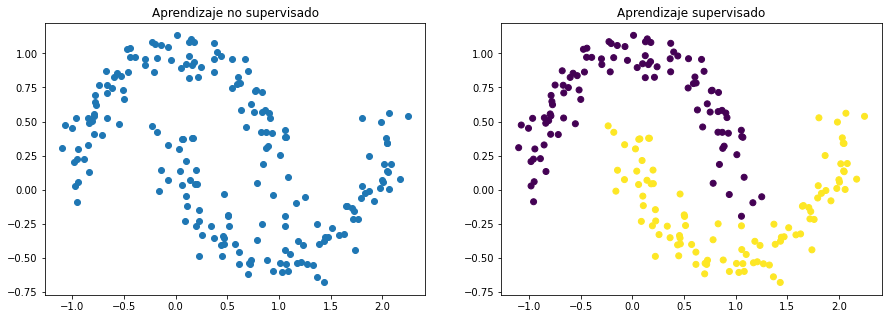

In [6]:
fig=plt.figure(figsize=(15,5))
ax1,ax2=fig.add_subplot(121),fig.add_subplot(122)
ax1.scatter(*X.T)
ax2.scatter(*X.T,c=y,cmap=plt.cm.viridis)
ax1.set_title("Aprendizaje no supervisado")
ax2.set_title("Aprendizaje supervisado")

¿Qué puede decir de ambos gráficos? ¿Qué es lo que se quiere representar?

# El Desempeño P
Para evaluar las habilidades de un modelo de machine learning es necesaria una manera cuantitativa de medir su **desempeño**. Una medida de desempeño es tan importante como el problema a solucionar. 

La finalidad de un desempeño se divide en dos: 

1. **P** nos debe ayudar a llegar una **T** óptima para la base de datos
2. **P** mide cómo nuestro modelo, bajo **T**, generaliza las decisiones para ejemplos **aún no observados** (predicciones). 

En general, dado una serie de datos, dividmos nuestros datos en dos partes: **training** y **test**. El objetivo es encontrar **T** dato **training** que generalice los valores no observados dentro del test. 

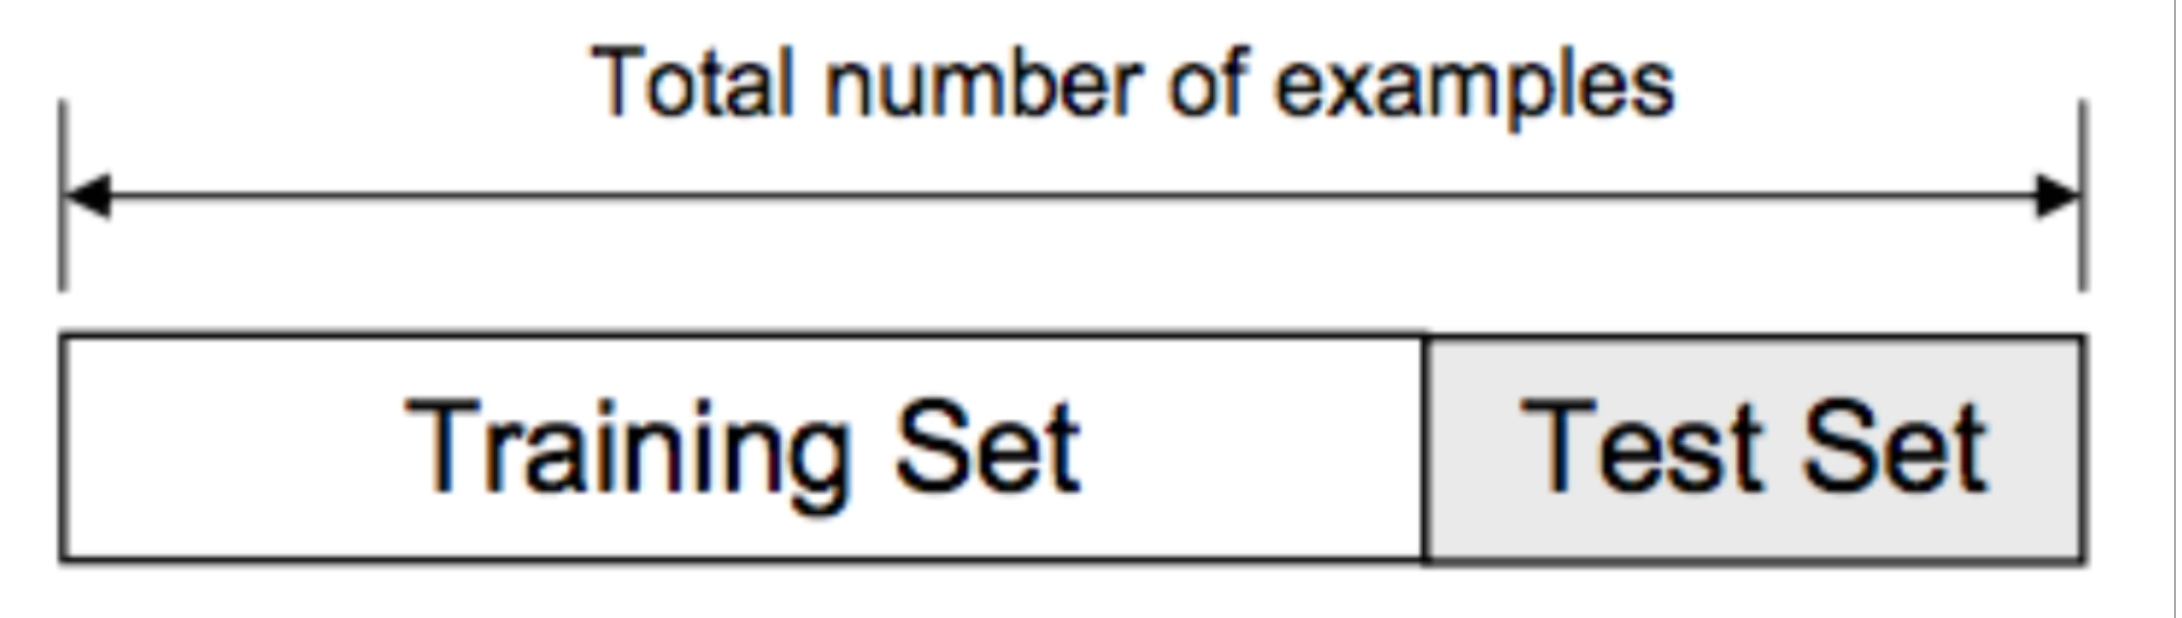

## Métrica de desempeño 

**Clasificación**
$$
    \mbox{accuracy} = \frac{\#\mbox{Predicciones Correctas}}{\#\mbox{Valores totales}}
$$

**Regresión**
$$
    \mbox{MSE} = \frac{1}{n}\sum_{i=1}^n (\hat{y}_i - y_i)^2
$$

$$
    \mbox{R}^2 = 1 - \frac{\mbox{RSS}}{\mbox{TSS}} = 1 -  \frac{\sum_i^n(y_i - \hat y_i)^2}{\sum_i^n(y_i - \bar y)^2}
$$

## Ejercicio
Supongamos que entrenamos un modelo de clasificación binario ({0,1}) que nos arroja predicciones dentro de la lista `preds`. Si los valores verdaderos se encuentran dentro de una lista `verdaderos`, calcula el **accuracy** del modelo

```python

predicciones=np.array([1,1,0,1,0,0])
verdadero=np.array([1,0,0,1,1,0])


```

In [7]:
predicciones=np.array([1,1,0,1,0,0])
verdadero=np.array([1,0,0,1,1,0])

In [8]:
#accuracy 
np.sum(predicciones==verdadero)/len(predicciones)

0.6666666666666666

In [9]:
np.sum(predicciones==verdadero)

4

# La Regresión Lineal (v.1)

Como su nombre lo menciona, la regresión lineal es un problema de regresión. En este modelo asumimos que nuestros **features ó características ó varibles independientes** se relacionan con el **targets ó variable respuesta ó variable dependiente** de una menera lineal. 

Otra manera de plantear el problema es decir que nuestras observaciones son las *variables independienes* y la *variable dependiente* es la variable a predecir. 

Como primer ejemplo, consideramos que tenemos una base de datos (**E**) (x,y)

x|y
-|-
$x_1$|$y_1$
$x_2$|$y_2$
$x_3$|$y_3$
...|...
$x_{100}$|$y_{100}$

Nuestra hipótesis (la tarea **T** a resolver), es poder aproximar $y$ dado $x$ de la siguiente manera: 

$$
    \hat y = \theta_0 + \theta_1 x
$$

In [10]:
#semilla inicial para llegar al mismo resultado
seed(1643)
#Numero de observaciones simuladas
nobs=100
#features
X=np.linspace(0,1,nobs) + randn(nobs)*.3

In [11]:
# qué hace la función linspace?
# qué hace la función randn?
# Qué tipo de objeto es X?
# Qué tipo de información hay en X ?
# Imprima X

In [12]:
#variable dependiente
# Por un momento supondremos que conocemos los valores de theta0 y theta1
theta0, theta1=.3,1.5


y=theta0 + theta1*X + randn(nobs)*.35

In [13]:
# Qué tipo de objeto es y?
# Qué tipo de información hay en y?
# Imprima y

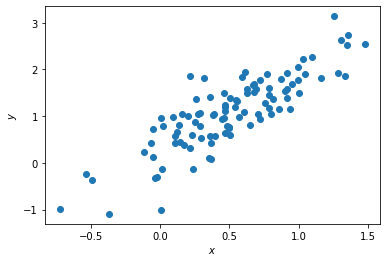

In [14]:
plt.scatter(X,y)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [15]:
# Diría que hay una relación lineal entre X y y?

¿Cómo encontramos  $\theta_0$, $\theta_1$?

## ¡Necesitamos una medida de desempeño!

Consideramos la función: 

$$
\begin{align}
    J(\theta_0, \theta_1) &= \frac{1}{n}\sum_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i)^2 \\
                          &= \frac{1}{n} \left[(\theta_0 + \theta_1 x_1 - y_1)^2 + (\theta_0 + \theta_1 x_2 - y_2)^2 + \ldots + (\theta_0 + \theta_1 x_{n} - y_{n})^2\right]
\end{align}   
$$

Es decir, mide la distancia de los puntos a la recta.

Nos gustaría minimizar $J(\theta_0, \theta_1)$

In [16]:
## Porqué?

## Ejercicio

Si `theta0_est=1.3` y `theta1_est=.3` son nuestras estimaciones de $\theta_0$ y  $\theta_1$ dado `X` y `y`, calcular 
$J(\theta_0, \theta_1)$

In [17]:
def J(yhat,y): return np.sum((yhat-y)**2)/len(y)

In [18]:
# Evalúe la función J

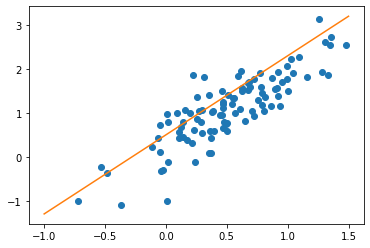

In [19]:
n=len(X)
theta1_opt=1.8
theta0_opt=0.5
xrange=np.linspace(-1,1.5,100)
plt.scatter(X,y)
plt.plot(xrange,theta0_opt+theta1_opt*xrange,color="tab:orange")

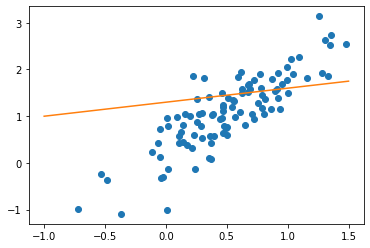

In [21]:
n=len(X)
theta0_est=1.3
theta1_est=0.3
xrange=np.linspace(-1,1.5,100)
plt.scatter(X,y)
plt.plot(xrange,theta0_est+theta1_est*xrange,color="tab:orange")

In [ ]:
# ¿Qué diferencia tienen las dos gráficas anteriores?

Para un *training dataset (x,y) con $n$ observaciones, se puede demostrar que los valores $\theta_0^*$, $\theta_1^*$ que minimizan $J(\theta_0, \theta_1)$ son: 
$$
    \theta_1^* = \frac{n\sum_{i=1}^nx_iy_i - \left(\sum_{i=1}^nx_i\right)\left(\sum_{i=1}^ny_i\right)}{n\sum_{i=1}^nx_i^2 - \left(\sum_{i=1}^nx_i\right)^2}
$$

$$
    \theta_0^* = \frac{1}{n}\sum_{i=1}^ny_i - \theta_1^* \frac{1}{n}\sum_{i=1}^nx_i
$$

# Ejercicio de autoevaluación 1
Calcular  `theta0_opt`, `theta1_opt` considerando las ecuaciones de arriba y comparar con los valres de `theta0` y `theta1` con los que generamos $y$ y con los que gráficamente se puede ver que son. 


## La Regresión Lineal Múltiple
¿Qué sucede si tenemos más de un feature (variable independiente) para cada observación? Supongamos que tenemos $n$ observaciones, cada una con $m$ features:

x1|x2|...|xn|y
-|-|-|-|-
$x_{1,1}$|$x_{1,2}$|$\ldots$|$x_{1,n}$|$y_1$
$x_{2,1}$|$x_{2,2}$|$\ldots$|$x_{2,n}$|$y_2$
$x_{3,1}$|$x_{3,2}$|$\ldots$|$x_{3,n}$|$y_3$
$\vdots$|$\vdots$|$\ldots$|$\vdots$|$\vdots$
$x_{m,1}$|$x_{m,2}$|$\ldots$|$x_{m,n}$|$y_{m}$

Donde $x_{i,j} = x^{(i)}_j$ indica la $j$-ésima característica de la $i$-ésima observación.

En este caso, el problema sería encontrar $\theta_0, \theta_1, \ldots, \theta_m$. Nuestra predicción para la $i$-ésima observación $\hat y$ estaría dada por
$$
    \begin{align}
    \hat y_i &= \theta_0 + \theta_1 x_{1} +  \theta_2 x_2 + \ldots + \theta_m x_m\\
            &= \theta^T x^i
    \end{align}
$$

Donde
$$
    \theta = \begin{bmatrix}
                \theta_0 \\
                \theta_1 \\
                \theta_2 \\
                \vdots  \\
                \theta_m
             \end{bmatrix}
$$

$$
    x_i = \begin{bmatrix}
                1 \\
                x_{1,i} \\
                x_{2,i} \\
                \vdots  \\
                x_{m,i}
             \end{bmatrix}
$$

Definimos nuestro *training* dataset como la siguiente representación matricial:
$$
    X = \begin{bmatrix}
        – x_1 – \\
        – x_2 – \\
        \vdots \\
        – x_n – \\
        \end{bmatrix}
        = \begin{bmatrix}
                1 & x_{1,1} & x_{1,2} & \ldots & x_{1,m}\\
                1 & x_{2,1} & x_{2,2} & \ldots & x_{2,m}\\
                \vdots & \vdots & \vdots & \ddots & \vdots\\
                1 & x_{n,1} & x_{n,2} & \ldots & x_{n,m}\\
          \end{bmatrix}
$$

siendo los targets:
$$
    y = \begin{bmatrix} y_1 & y_2 & \ldots & y_n \end{bmatrix}
$$

Para un problema de **regresión lineal múltiple**, el vector $\theta^* = [\theta_0, \theta_1, \ldots, \theta_m]$ de valores que minimizan $J(\theta_0, \theta_1, \ldots, \theta_m)$ dado por

$$
    \theta^* = (X^T X)^{-1} X^T y
$$

No te asustes, son sólo matrices y de eso ya sabes mucho con numpy

# Ejercicio de autoevaluación 2
Usar la solución cerrada de la forma matricial para llegar a los valores de la Parte1. 
Tip: `np.linalg.inv` desde `numpy`. 